In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv') #Se importan los datos
df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


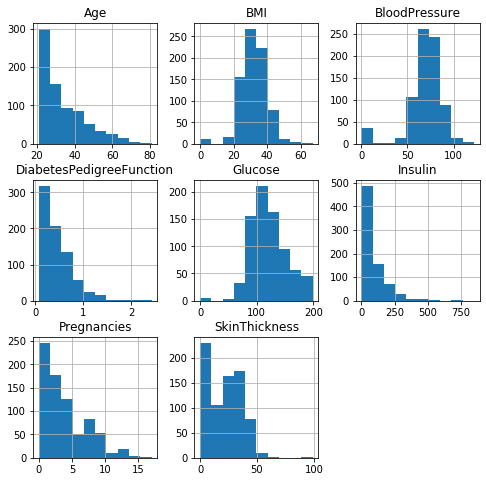

In [15]:
df.drop(['Outcome'],1).hist(figsize=(8,8))
plt.show()
#aqui se aprecian la distribucion de cada caracteristica

In [6]:
x = np.array(df[["BloodPressure","Glucose"]])
y = np.array(df['Outcome'])
X = np.array(list(zip(x,y)))

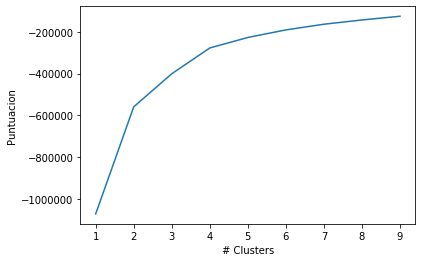

In [8]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('# Clusters')
plt.ylabel('Puntuacion')

plt.show()

In [9]:
#Se puede ver clasramente que en 4 la curva 
kmeans = KMeans(n_clusters=4).fit(x)
labels = kmeans.predict(x)

centroids = kmeans.cluster_centers_
print(centroids)

[[ 68.21885522  92.13804714]
 [ 76.10638298 170.75886525]
 [ 75.1774744  126.58703072]
 [  1.45945946 116.62162162]]


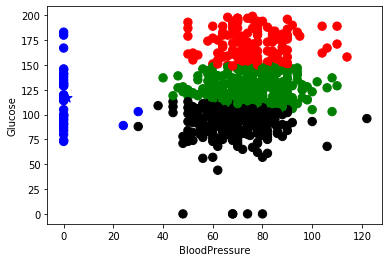

In [26]:
#Graficamos
colores=['black','red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
f1 = df['BloodPressure'].values
f2 = df['Glucose'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=100)
plt.xlabel("BloodPressure");
plt.ylabel("Glucose");
plt.show()

In [27]:
#Podemos determinar que la glucosa depende de los nivelesde preison